# Exploratory Data Analysis - Building Energy Performance Data for 2019

### Table of Contents

1. [Import Packages](#import)     
2. [Overview of Dataset](#overview)    
3. [Data Exploration](#exploration)    
3. [Data Cleaning](#cleaning)    
4. [Univariate Analysis](#univariate)    
5. [Bivariate and Multivariate Analysis](#bivariate-multivariate)    
6. [Outliers Detection](#outliers)      
7. [Summary and Conclusion](#summary)    

**Objective:**

To comprehensively explore and understand the "Listing of Building Energy Performance Data 2019" dataset, ensuring it's well-prepared and informed for any subsequent analysis or modeling.

**Description**

Listing of Building Energy Performance Data 2019.

| Title | Column Name | Data Type | Unit of Measure | Type |
|-------|-------------|-----------|-----------------|-------------|
| Buildingname | buildingname | Text (General) | - | Categorical |
| Buildingaddress | buildingaddress | Text (General) | - | Categorical |
| Buildingtype | buildingtype | Text (General) | - | Categorical |
| Buildingsize | buildingsize | Text (General) | - | Categorical |
| Greenmarkyearofaward | greenmarkyearofaward | Text (General) | - | Categorical |
| Greenmarkrating | greenmarkrating | Text (General) | - | Categorical |
| Greenmarkversion | greenmarkversion | Text (General) | - | Categorical |
| Grossfloorarea | grossfloorarea | Text (General) | m^2 | Numeric |
| 2018Energyuseintensity | 2018energyuseintensity | Numeric (General) | EUI | Numeric |
| 2019Energyusintensity | 2019energyusintensity | Numeric (General) | EUI | Numerc |
| Voluntarydisclosure | voluntarydisclosure | Text (General) | - | Categorical (Binary) |

## 1. Import Packages<a class="anchor" id="import"></a>

In [1]:
import sys
from itertools import combinations

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from phik import phik_matrix

sys.path.append("..")

from src.utils.eda.eda import (
    drop_columns,
    find_best_imputation_for_feature,
    impute_with_iterative, 
    impute_with_knn, 
    impute_with_mean, 
    impute_with_median,
    impute_missing_values,
    identify_iqr_outliers,
    identify_z_score_outliers,
    rename_columns,
    test_normality,
)

## 2. Overview of Dataset<a class="anchor" id="overview"></a>


In this section, we will display basic general information and statistics of the Building Energy Performance for 2019 dataset. We will also explore each column briefly to gain a better understanding of our data.

**Load in dataset:**

In [2]:
dataframe = pd.read_excel("../data/raw/ListingofBuildingEnergyPerformanceData2019.xlsx")

**Prints information about a DataFrame including the index dtype and columns, non-null values and memory usage:**

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   buildingname            597 non-null    object 
 1   buildingaddress         722 non-null    object 
 2   buildingtype            825 non-null    object 
 3   buildingsize            600 non-null    object 
 4   greenmarkyearaward      333 non-null    float64
 5   greenmarkrating         333 non-null    object 
 6   greenmarkstatus         825 non-null    object 
 7   grossfloorarea          722 non-null    float64
 8   2018energyuseintensity  817 non-null    float64
 9   2019energyusintensity   823 non-null    float64
 10  voluntarydisclosure     825 non-null    object 
dtypes: float64(4), object(7)
memory usage: 71.0+ KB


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Statistics</b>: 

Number of rows: `825`    
Number of column: `11` (4 `float64` columns and 7 `object` columns)

There appears to be missing values in all the columns except `voluntarydisclosure` which will be handled in the next section.
</p>
</div>

**Display number of unique values for categorical columns:**

In [4]:
# Extract categorical columns
categorical_columns = list(dataframe.select_dtypes(include=['object']).columns)
categorical_columns.append('greenmarkyearaward')
dataframe[categorical_columns].describe(include='all')

,buildingname,buildingaddress,buildingtype,buildingsize,greenmarkrating,greenmarkstatus,voluntarydisclosure,greenmarkyearaward
count,597,722,825,600,333,825,825,333.000000
unique,584,722,5,2,5,2,2,NaN
top,PELANGI VILLAGE,"3 FUSIONOPOLIS LINK, SINGAPORE 138543",Commercial Building,Large,Platinum,No,Y,NaN
freq,7,1,600,391,139,451,722,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.792793
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.736799
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Break down of the provided statistics for each categorical column:</b>

1. **buildingname**:
    - Unique values: 584
    - Non-Null Count: 597
    - Interpretation: There are 597 buildings listed, of which 584 have unique names. This implies that there are potentially duplicate or similarly named buildings in the dataset.

2. **buildingaddress**:
    - Unique values: 722
    - Non-Null Count: 722
    - Interpretation: Every building listed has a unique address, as none of them share the same address. The dataset has no missing addresses.

3. **buildingtype**:
    - Unique values: 5
    - Non-Null Count: 825
    - Interpretation: There are 5 distinct types of buildings in the dataset. The total count is 825, which means every building has an associated type and there are no missing values for this feature.

4. **buildingsize**:
    - Unique values: 2
    - Non-Null Count: 600
    - Interpretation: Buildings are categorized into 2 different sizes. Out of 825 total buildings, only 600 have size information, indicating that 225 buildings have missing data regarding their size.

5. **greenmarkrating**:
    - Unique values: 5
    - Non-Null Count: 333
    - Interpretation: There are 5 unique Green Mark ratings in the dataset. Only 333 buildings out of 825 have a Green Mark rating, suggesting that not every building has undergone or qualified for a Green Mark rating.

6. **greenmarkstatus**:
    - Unique values: 2
    - Non-Null Count: 825
    - Interpretation: There are only 2 unique statuses for Green Mark — probably "Yes" for Green Mark buildings and "No" for non-Green Mark buildings. All buildings have a status, which means there's no missing data for this column.

7. **voluntarydisclosure**:
    - Unique values: 2
    - Non-Null Count: 825
    - Interpretation: There are 2 unique statuses for voluntary disclosure, likely indicating whether a building has disclosed certain information voluntarily or not. All buildings have this status, indicating there's no missing data for this column.

8. **greenmarkyearaward**:
    - Unique values: 14
    - Non-Null Count: 333
    - Interpretation: Over the years, there have been 14 distinct years in which the Green Mark awards were given out. Only 333 buildings have received a Green Mark award, aligning with the count for the Green Mark rating column.

**Overall Insights**:
- Some buildings might have similar or duplicate names, which requires further inspection.
- While every building has a type, address, Green Mark status, and voluntary disclosure status, other attributes such as building size, Green Mark rating, and Green Mark award year have missing data.
- A significant number of buildings haven't received a Green Mark rating or award, indicating the exclusivity or the recent nature of the rating system.
- Data integrity and consistency seem to be maintained across certain columns, but others might require imputation or handling of missing values during preprocessing.

</p>
</div>

**Display count, mean, max and standard deviation of numerical columns:**

In [5]:
dataframe.loc[:, ~dataframe.columns.isin(categorical_columns)].describe()

,grossfloorarea,2018energyuseintensity,2019energyusintensity
count,7.220000e+02,817.000000,823.000000
mean,3.632735e+04,245.789014,241.342943
std,6.748276e+04,195.453428,172.977909
min,3.570000e+02,2.070275,1.698191
25%,9.103500e+03,133.291495,132.364684
50%,1.724100e+04,201.405065,200.810217
75%,3.693000e+04,304.474420,304.046437
max,1.082515e+06,2750.350602,2462.490474


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation of the provided statistics for each numeric column:</b>
Here's an interpretation of the given statistics for the numeric columns:

1. **grossfloorarea**:
    - **Count**: There are 722 entries with non-null values.
    - **Mean**: On average, buildings have a gross floor area of about 36,327.35 m².
    - **Standard Deviation (std)**: The spread or variability in the gross floor area across buildings is quite large, with a standard deviation of 67,482.76 m². This indicates a wide range of building sizes.
    - **Min**: The smallest building in the dataset has a gross floor area of just 357 m².
    - **25% (1st Quartile)**: 25% of the buildings have a gross floor area of up to 9,103.5 m².
    - **50% (Median)**: The median building size is 17,241 m², meaning half the buildings are smaller than this and half are larger.
    - **75% (3rd Quartile)**: 75% of the buildings have a gross floor area of up to 36,930 m².
    - **Max**: The largest building in the dataset has a whopping gross floor area of 1,082,515 m².
2. **2018energyuseintensity**:
    - **Count**: There are 817 non-null entries for this column.
    - **Mean**: In 2018, buildings used, on average, 245.79 units of energy per m² (assuming the unit is kWh/m² or a similar measure of energy intensity).
    - **Standard Deviation**: The variability in energy use intensity in 2018 is 195.45 units. This wide spread suggests different energy consumption habits or efficiencies across buildings.
    - **Min**: The most energy-efficient building in 2018 had an energy intensity of just 2.07 units.
    - **Median**: The middle value for energy intensity in 2018 is 201.41 units.
    - **75%**: Three-quarters of the buildings had an energy use intensity below 304.47 units in 2018.
    - **Max**: The highest energy intensity in 2018 was 2750.35 units, indicating either a very large or a very inefficient building.

3. **2019energyusintensity**:
    - **Count**: 823 non-null values indicate that this column has data for 823 buildings.
    - **Mean**: On average, buildings consumed 241.34 units of energy per m² in 2019.
    - **Standard Deviation**: The spread in energy use intensity in 2019 is slightly less than in 2018, with a value of 172.98 units.
    - **Min**: The most energy-efficient building in 2019 had an energy intensity of 1.70 units, even better than in 2018.
    - **Median**: The median energy intensity value for 2019 is very close to that of 2018, at 200.81 units.
    - **75%**: 75% of the buildings consumed up to 304.05 units of energy per m² in 2019.
    - **Max**: The building with the highest energy consumption in 2019 had an intensity of 2462.49 units, which is less than the maximum in 2018. This might suggest some improvements or changes in the building's operations.

**Overall Observations**:
- The dataset captures a wide variety of buildings, both in terms of size (`grossfloorarea`) and energy consumption (`2018energyuseintensity` and `2019energyusintensity`).
- Energy consumption (as measured by energy use intensity) seems to have slightly decreased or become more efficient from 2018 to 2019, as evidenced by the decrease in the mean and the maximum values.
- There's a substantial variability in energy consumption across buildings in both years, which might be due to differences in building operations, types, ages, or other factors not specified in the provided data.
- A deeper dive into the data might provide more insights into the factors driving these energy consumption differences and the trends over the years.

</p>
</div>

## 3. Data Exploration<a class="anchor" id="exploration"></a>

**Check for duplicate rows:**

In [6]:
dataframe.duplicated().sum()

0

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Insights:</b> There are no duplicated records in the Building Energy Performance for 2019 dataset.
</p>
</div>

**Check for missing values:**

In [7]:
print(f"Number of missing values per column:\n\n{dataframe.isnull().sum()}")

Number of missing values per column:

buildingname              228
buildingaddress           103
buildingtype                0
buildingsize              225
greenmarkyearaward        492
greenmarkrating           492
greenmarkstatus             0
grossfloorarea            103
2018energyuseintensity      8
2019energyusintensity       2
voluntarydisclosure         0
dtype: int64


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b>

1. **buildingname (228 missing)**:
    - A significant portion of data is missing for building names. 
    - This could mean that some records were entered without associating them with a particular building.

2. **buildingaddress (103 missing)**:
    - If both building name and address are missing for a particular row, it suggests a significant data entry oversight.

3. **buildingtype (0 missing)**:
    - No data is missing, which is excellent as it indicates the type of each building is known. This might be a critical feature for any modeling or analysis.

4. **buildingsize (225 missing)**:
    - Almost as many missing as the building name. It might be worth investigating if these missing values correspond to the same rows.

5. **greenmarkyearaward & greenmarkrating (492 missing for both)**:
    - A significant portion of data is missing. This suggests many buildings haven't received a green mark award or rating.
    - It's essential to differentiate between buildings that didn't get an award (and thus it's logically "missing") versus those where the data might have been overlooked.

6. **greenmarkstatus (0 missing)**:
    - No missing data, which is valuable. If this indicates whether a building has a green mark, it can help interpret the missing values in `greenmarkyearaward` and `greenmarkrating`.

7. **grossfloorarea (103 missing)**:
    - Same count as the missing addresses. Need to check if they are missing in the same rows.

8. **2018energyuseintensity (8 missing) & 2019energyusintensity (2 missing)**:
    - Minimal missing values. Need to decide if these rows should be dropped or imputed.

9. **voluntarydisclosure (0 missing)**:
    - No missing data, indicating that this feature is well-recorded for every building.

<b>Summary:<b>

- `buildingname` and `buildingaddress` columns can be considered to drop as both contains mostly unique values and a significant amount of missing values. Along with the nature of both columns, both column s might not be particularly useful in analysis and training model to predict building energy performance. However, one can consider keeping both columns as lookup value as it provides value for certain business stakeholders.

- `buildingsize`, `grossfloorarea`, `greenmarkyearaward`, `greenmarkrating`, `2018energyuseintensity` and `2019energyusintensity` have the potential to be a critical feature for modeling or analysis. To decide on the strategy of handling missing values, we will require a deeper look with context of domain knowledge.

- `buildingtype`, `greenmarkstatus` and `voluntarydisclosure` have no missing values.

</p>
</div>

**Exploring `buildingsize`:**

In [8]:
dataframe.buildingsize.value_counts()

buildingsize
Large    391
Small    209
Name: count, dtype: int64

In [9]:
dataframe[dataframe['buildingsize'].isna()]

,buildingname,buildingaddress,buildingtype,buildingsize,greenmarkyearaward,greenmarkrating,greenmarkstatus,grossfloorarea,2018energyuseintensity,2019energyusintensity,voluntarydisclosure
600,NaN,NaN,Healthcare Facility,NaN,NaN,NaN,No,NaN,104.923564,106.725655,N
601,NaN,"1 JURONG EAST STREET 21, SINGAPORE 609606",Healthcare Facility,NaN,2013.0,Platinum,Yes,186357.0,261.719434,262.086479,Y
602,SENGKANG GENERAL HOSPITAL,"110 SENGKANG EAST WAY, SINGAPORE 544886",Healthcare Facility,NaN,2014.0,Platinum,Yes,288000.0,235.925958,275.161133,Y
603,NATIONAL HEART CENTRE OF SINGAPORE,"5 HOSPITAL DRIVE, SINGAPORE 169609",Healthcare Facility,NaN,2014.0,Platinum,Yes,48432.0,306.456191,311.810828,Y
604,KHOO TECK PUAT HOSPITAL,"90 YISHUN CENTRAL, SINGAPORE 768828",Healthcare Facility,NaN,2010.0,Platinum,Yes,103534.0,310.945231,318.822947,Y
...,...,...,...,...,...,...,...,...,...,...,...
820,NaN,"32 JURONG PORT ROAD, SINGAPORE 619104","Civic, Community and Cultural Institution",NaN,NaN,NaN,No,20940.0,308.516601,286.763732,Y
821,NATIONAL MUSEUM OF SINGAPORE,"93 STAMFORD ROAD, SINGAPORE 178897","Civic, Community and Cultural Institution",NaN,NaN,NaN,No,20121.0,489.191899,450.297003,Y
822,KALLANG THEATRE,"1 STADIUM WALK, SINGAPORE 397688","Civic, Community and Cultural Institution",NaN,NaN,NaN,No,12098.0,111.174980,57.358021,Y
823,SINGAPORE CONFERENCE HALL,"7 SHENTON WAY, SINGAPORE 068810","Civic, Community and Cultural Institution",NaN,NaN,NaN,No,8630.0,179.724587,177.922102,Y


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Decision:</b> 

There doesn't appear to be any pattern in the missing values. Based on the value count output, we can see the categorical string
values of `large` and `small`. Since there are 225 missing values, this takes up approximately 27% of the dataset and would not be advisable to drop the rows with missing values. Instead, the appropriate treatment to handle missing value would be to impute it with the value `Unknown`.
</p>
</div>

**Exploring `greenmarkyearaward` and `greenmarkrating`:**

In [10]:
dataframe.greenmarkyearaward.value_counts()

greenmarkyearaward
2017.0    67
2018.0    55
2019.0    47
2016.0    46
2015.0    26
2014.0    25
2013.0    22
2012.0    19
2011.0    11
2009.0     7
2008.0     3
2010.0     2
2006.0     2
2007.0     1
Name: count, dtype: int64

In [11]:
dataframe.greenmarkrating.value_counts()

greenmarkrating
Platinum      139
Gold           71
GoldPlus       62
Certified      59
Legislated      2
Name: count, dtype: int64

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Decision:</b> 

Both `greenmarkyearaward` and `greenmarkrating` columns have the same number of missing values. Upon further investigation, it appears the particular buildings in question are not awarded a Green Mark award, hence the missing values in both columns. Therefore, the strategy to handling missing values in both columns will be to impute with values of `0.0` and `Not Awarded` for `greenmarkyearaward` and `greenmarkrating` respectively.
</p>
</div>

**Exploring `grossfloorarea`:**

In [12]:
dataframe[dataframe['grossfloorarea'].isna()]

,buildingname,buildingaddress,buildingtype,buildingsize,greenmarkyearaward,greenmarkrating,greenmarkstatus,grossfloorarea,2018energyuseintensity,2019energyusintensity,voluntarydisclosure
2,NaN,NaN,Commercial Building,Large,NaN,NaN,Yes,NaN,53.629747,50.072976,N
3,NaN,NaN,Commercial Building,Large,NaN,NaN,No,NaN,69.687459,74.179366,N
9,NaN,NaN,Commercial Building,Large,NaN,NaN,Yes,NaN,94.929415,88.630192,N
18,NaN,NaN,Commercial Building,Large,NaN,NaN,Yes,NaN,123.790732,109.565449,N
29,NaN,NaN,Commercial Building,Large,NaN,NaN,Yes,NaN,105.890127,116.188125,N
...,...,...,...,...,...,...,...,...,...,...,...
773,NaN,NaN,"Civic, Community and Cultural Institution",NaN,NaN,NaN,No,NaN,298.382979,285.336170,N
774,NaN,NaN,"Civic, Community and Cultural Institution",NaN,NaN,NaN,No,NaN,1337.727028,1211.742178,N
788,NaN,NaN,"Civic, Community and Cultural Institution",NaN,NaN,NaN,No,NaN,64.835050,65.440415,N
803,NaN,NaN,"Civic, Community and Cultural Institution",NaN,NaN,NaN,No,NaN,106.260390,105.687001,N


In [13]:
missing_subset_dataframe = dataframe[dataframe['grossfloorarea'].isna()]
print('Value count of columns with missing values in `grossfloorarea` -\n')
print(f'Value count of buildingname: {missing_subset_dataframe.buildingname.value_counts()}')
print(f'Value count of buildingaddress: {missing_subset_dataframe.buildingaddress.value_counts()}')
print(f'Value count of buildingtype: \n{missing_subset_dataframe.buildingtype.value_counts()}')

Value count of columns with missing values in `grossfloorarea` -

Value count of buildingname: Series([], Name: count, dtype: int64)
Value count of buildingaddress: Series([], Name: count, dtype: int64)
Value count of buildingtype: 
buildingtype
Commercial Building                          73
Healthcare Facility                          12
Sports and Recreation Centre                  9
Civic, Community and Cultural Institution     6
Educational Institution                       3
Name: count, dtype: int64


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Decision:</b> 

Upon a further look, the missing values in `grossfloorarea` appears to coincide with missing values in `buildingname` and `buildingaddress` which makes sense as it is unable to definitively obtain the `grossfloorarea` of an unknown building. However, the number of missing values makes up approximately 12.5% of the dataset which will be lost if the rows are dropped. 

To decide on an appropriate method of imputation, we need to first ensure that we do not introduce bias or distort the distribution of the data. In the `Univariate Analysis`, we will need to determine the original distribution of `grossfloorarea` feature. Next, we will experiment and evaluate with different methods of imputation statistically.
</p>
</div>

**Exploring `2018energyuseintensity` and `2019energyusintensity`:**

In [14]:
dataframe[dataframe['2018energyuseintensity'].isna() | dataframe['2019energyusintensity'].isna()]

,buildingname,buildingaddress,buildingtype,buildingsize,greenmarkyearaward,greenmarkrating,greenmarkstatus,grossfloorarea,2018energyuseintensity,2019energyusintensity,voluntarydisclosure
75,TRIPLEONE SOMERSET,"111 SOMERSET ROAD, SINGAPORE 238164",Commercial Building,Large,2012.0,GoldPlus,Yes,68233.0,NaN,163.031628,Y
202,NaN,NaN,Commercial Building,Large,NaN,NaN,Yes,NaN,NaN,NaN,N
216,NaN,"101 BUKIT PANJANG ROAD, SINGAPORE 679910",Commercial Building,Small,2011.0,Certified,Yes,13855.0,NaN,84.630904,Y
227,MAXWELL CHAMBERS SUITES,"28 MAXWELL ROAD, SINGAPORE 069120",Commercial Building,Small,2019.0,Certified,Yes,6266.0,NaN,106.181088,Y
357,RAFFLES HOTEL,"1 BEACH ROAD, SINGAPORE 189673",Commercial Building,Large,NaN,NaN,No,43360.0,NaN,215.165014,Y
482,AMK HUB,"53 ANG MO KIO AVENUE 3, SINGAPORE 569933",Commercial Building,Large,2019.0,GoldPlus,Yes,47873.0,NaN,483.658680,Y
757,AMERICAN CLUB,"21 SCOTTS ROAD, SINGAPORE 228219",Sports and Recreation Centre,NaN,2019.0,Certified,Yes,12001.0,NaN,444.061030,Y
761,NaN,NaN,Sports and Recreation Centre,NaN,NaN,NaN,No,NaN,NaN,NaN,N


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Decision:</b> 

For rows missing in both `2018energyuseintensity` and `2019energyusintensity`, the decision will be to drop it due the missing values of other essential columns. However, for the rows missing in `2018energyuseintensity`, we can either drop it or perform imputation based on the other rows.
</p>
</div>

## 4. Data Cleaning<a class="anchor" id="cleaning"></a>

In this section, the following initial data cleaning steps will be performed:

- Drop `buildingname` and `buildingaddress`
- Impute missing values in `buildingsize` with "Unknown"
- Impute missing values in `greenmarkyearaward` with 0.0
- Impute missing values in `greenmarkrating` with "Not Awarded"
- Rename `2019energyusintensity` to `2019energyuseintensity`

In [15]:
# Instantiate list of columns to drop
columns_to_drop = ['buildingname', 'buildingaddress']

# Instantiate dictionary where key value is column and item value is new value
imputation_dictionary = {
    'buildingsize': 'Unknown',
    'greenmarkyearaward': 0.0,
    'greenmarkrating': 'Not Awarded',
}

# Instanstiate dictionary mapping old column name to new column name
rename_mapper = {'2019energyusintensity': '2019energyuseintensity'}

# Drop columns
dataframe = drop_columns(dataframe=dataframe, columns=columns_to_drop)

# Rename column
dataframe = rename_columns(dataframe=dataframe, mapper=rename_mapper)

# Impute missing values
for key, item in imputation_dictionary.items():
    dataframe = impute_missing_values(dataframe=dataframe, column=key, new_value=item)

INFO:root:Dropped columns - ['buildingname', 'buildingaddress']
INFO:root:Impute missing values for buildingsize
INFO:root:Impute missing values for greenmarkyearaward
INFO:root:Impute missing values for greenmarkrating


## 5. Univariate Analysis<a class="anchor" id="univariate"></a>

**Graphical Representation - Categorical Features:**

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


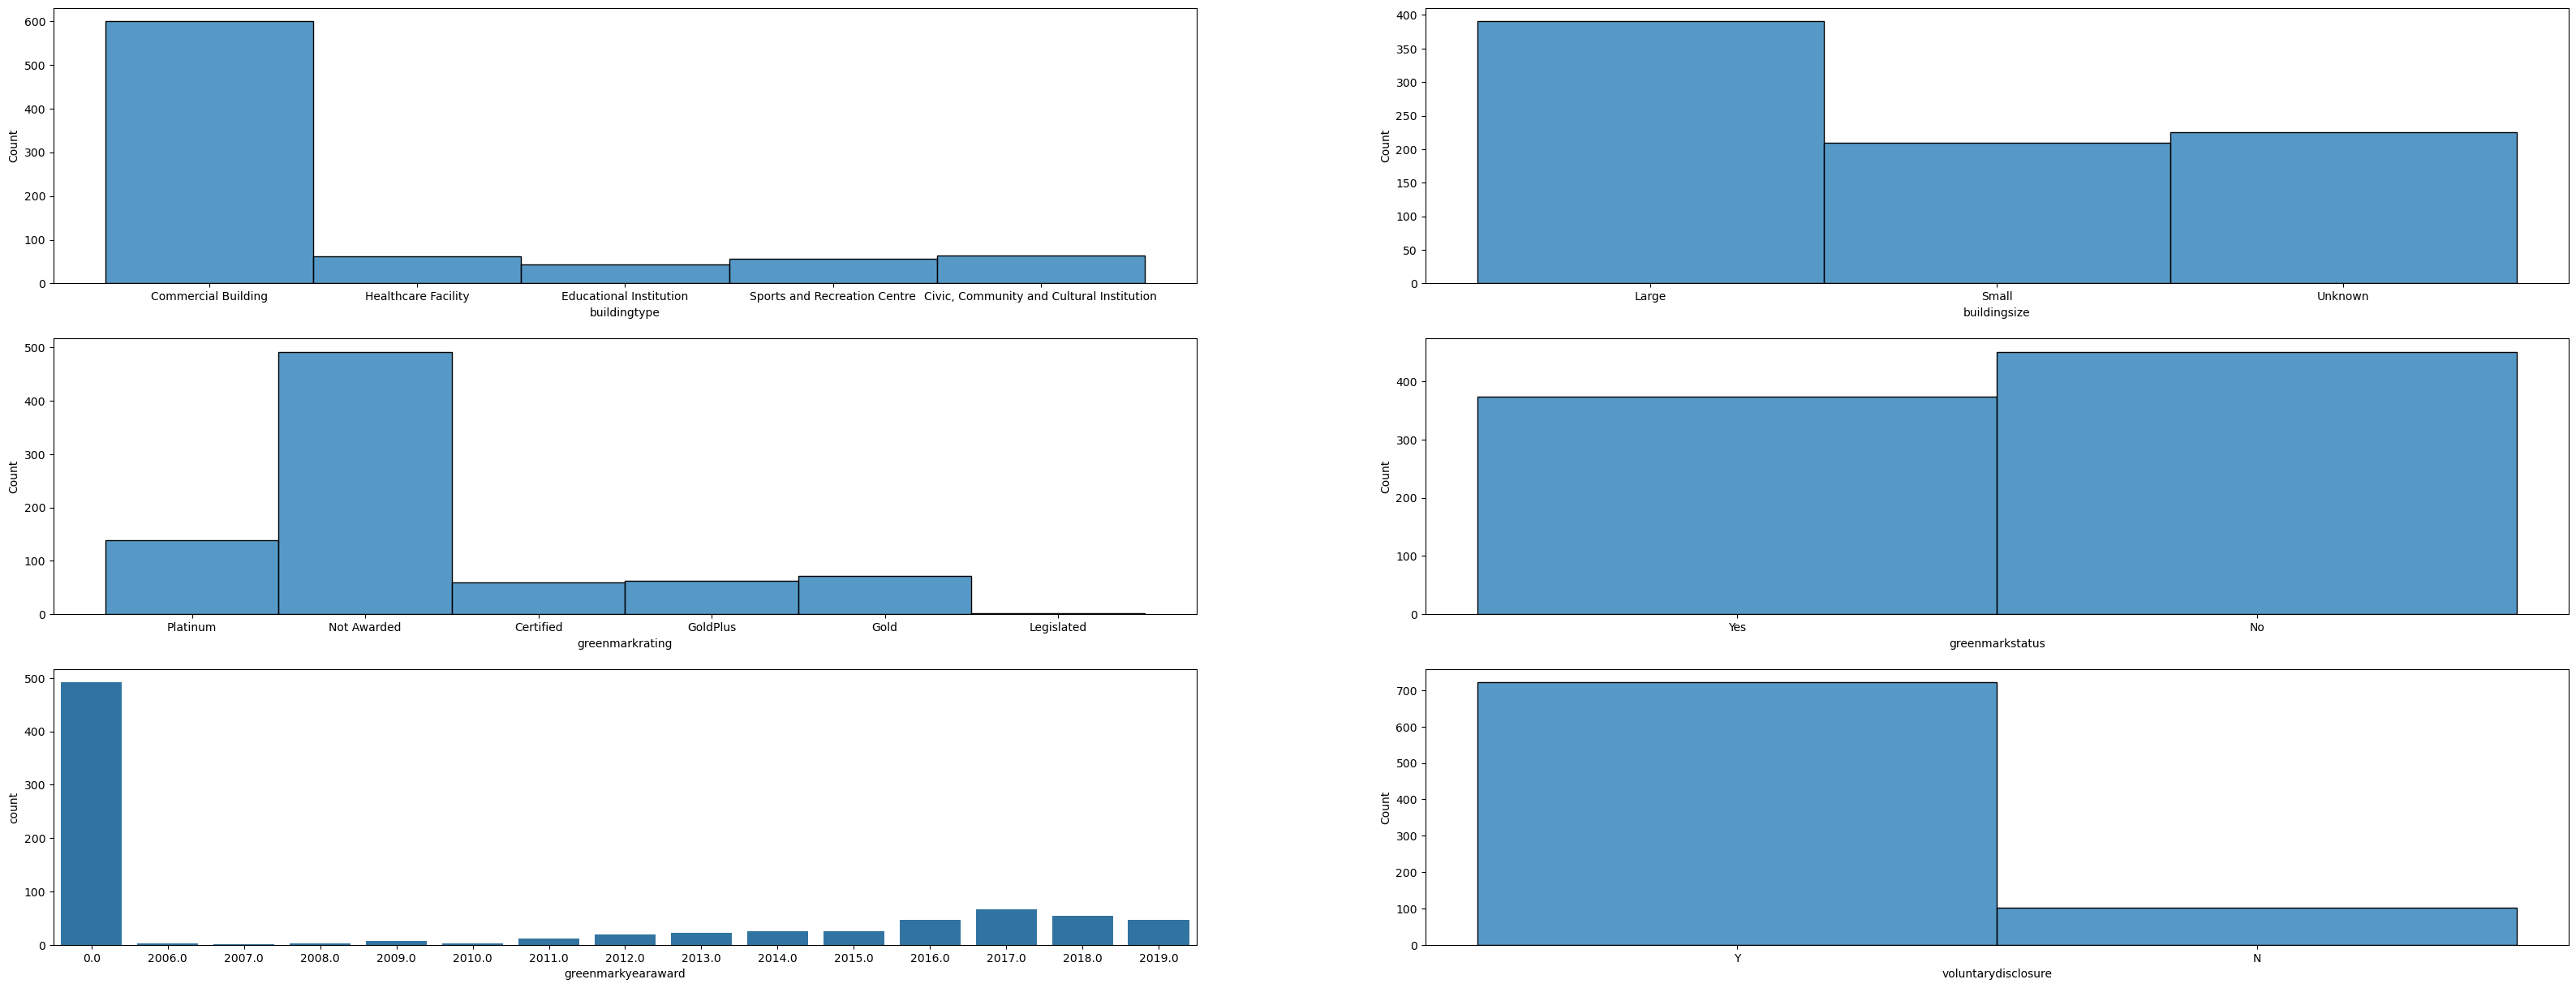

In [16]:
fig, axis = plt.subplots(3, 2, figsize = (40, 15))

sns.histplot(data = dataframe, x = 'buildingtype', ax=axis[0, 0])
sns.histplot(data = dataframe, x = 'buildingsize', ax=axis[0, 1])

sns.histplot(data = dataframe, x = 'greenmarkrating', ax=axis[1, 0])
sns.histplot(data = dataframe, x = 'greenmarkstatus', ax=axis[1, 1])

sns.countplot(data = dataframe, x = 'greenmarkyearaward',  ax=axis[2, 0])
sns.histplot(data = dataframe, x = 'voluntarydisclosure', ax=axis[2, 1]);

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b> 

1. **buildingtype**: 
   - The majority of the buildings in the dataset are classified as "Commercial Building", with almost 600 buildings belonging to this category.
   - "Civic, Community and Cultural Institution" and "Healthcare Facility" are the next most common, but they're significantly less frequent than "Commercial Building".
   - "Sports and Recreation Centre" and "Educational Institution" are the least common building types.

2. **greenmarkrating**:
   - Most buildings have been rated as "Not Awarded", suggesting that a significant number of buildings did not receive any green mark rating.
   - "Platinum" is the next most common rating, followed by "Gold", "GoldPlus", and "Certified".
   - The "Legislated" category appears to be the least frequent among the ratings.

3. **buildingsize**: 
   - The vast majority of buildings are categorized as "Large".
   - "Unknown" buildings are less common, and a smaller fraction of buildings have an "Small" size.

4. **greenmarkstatus**:
   - A significant majority of the buildings have a "No" status for greenmark, suggesting that most buildings in this dataset did not receive some form of green mark certification or recognition.
   - The number of buildings with a "Yes" status is slightly smaller in comparison.

5. **greenmarkyearaward**: 
   - The bulk of the buildings received their green mark awards around the year 2017.
   - There's a gradual increase in the number of awards given in subsequent years, with a slight decline observed around 2018.

6. **voluntarydisclosure**:
   - The vast majority of entries in the dataset chose "Y" for voluntary disclosure, with a very small number opting for "N".
   - This suggests that most buildings or entities in the dataset are open to voluntarily disclosing certain information.

**Overall Observations**:
- A large number of buildings are commercially oriented and of a large size.
- While many buildings have a green mark status of "Yes", a significant number did not receive any specific green mark rating.
- Most of the buildings appear to be open to voluntary disclosure.
</p>
</div>

**Graphical Representation - Numerical Features:**

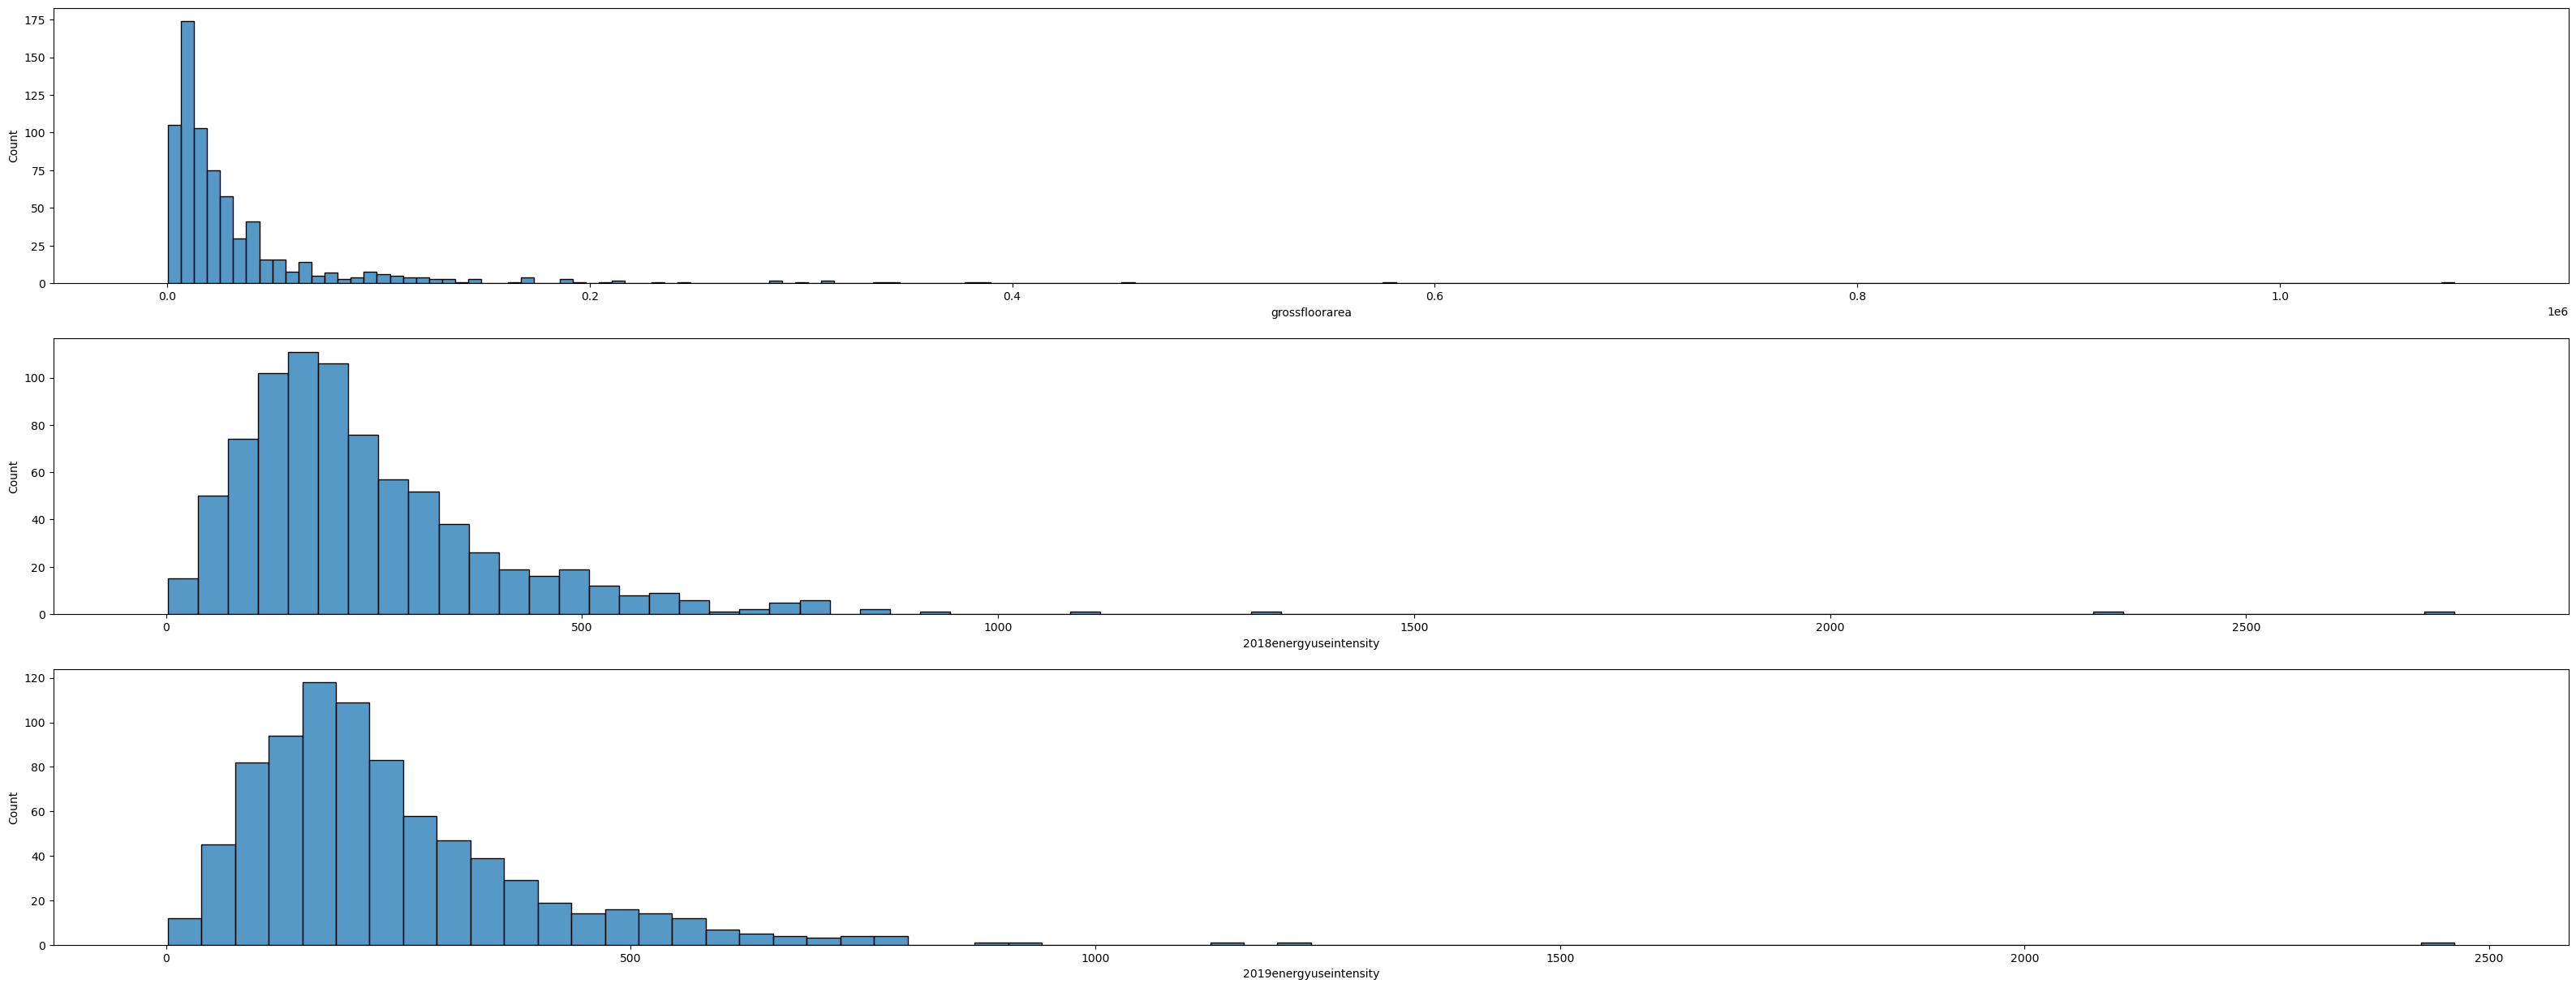

In [17]:
fig, axis = plt.subplots(3, 1, figsize = (40, 15))

sns.histplot(data = dataframe, x = 'grossfloorarea', ax=axis[0])
sns.histplot(data = dataframe, x = '2018energyuseintensity', ax=axis[1])
sns.histplot(data = dataframe, x = '2019energyuseintensity', ax=axis[2]);

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b> 

1. **grossfloorarea**:
    - This histogram shows the distribution of `grossfloorarea` values.
    - The x-axis ranges from 0.0 to 1.0. The majority of values are clustered around the 0.0 to 0.2 range, with the highest peak occurring close to 0.0.
    - This indicates that a significant proportion of the buildings have a `grossfloorarea` value close to 0.0, with fewer buildings having higher values. The distribution is right-skewed, meaning there are a few buildings with larger gross floor areas.

2. **2018energyuseintensity**:
    - This graph represents the distribution of energy use intensity for the year 2018.
    - The majority of data points are clustered between 0 and 500, with the peak of the distribution occurring somewhere in the middle of this range.
    - The data tails off after 1000 and has sparse counts in higher intervals.
    - This indicates a roughly bell-shaped, or normal, distribution for this feature, although with a right skew.

3. **2019energyuseintensity**:
    - The histogram for `2019energyuseintensity` is similar in shape to the 2018 version.
    - Most of the data points are concentrated between 0 and 500, and there's a drop-off in counts beyond 1000.
    - Like the previous feature, this one also shows a roughly bell-shaped distribution with a right skew, indicating most buildings have an energy use intensity in the lower to mid-range, with fewer buildings having higher intensities.

**Statistical Analysis:**    
Based on the graphical representations:

1. **Central Tendency**:
    - The mode (most frequent value) for `grossfloorarea` is close to 0.0.
    - The mode for `2018energyuseintensity`, `2019energyuseintensity`, and `2020energyuseintensity` seems to be in the mid-range of 0 to 500.

2. **Spread**:
    - The spread for `grossfloorarea` is narrow, with most values clustered near 0.0.
    - The spread for the energy use intensity features is wider, ranging from 0 to beyond 1000.

3. **Skewness**:
    - The `grossfloorarea` distribution is right-skewed.
    - The energy use intensity histograms for both years are also right-skewed.

4. **Outliers**:
    - There appear to be outliers in all histograms, especially for higher values, as seen from the sparse bars in the right tail of the distributions.

5. **Distribution**:
    - The distribution of all three histograms resemble the continuous distribution of a log-normal distribution.


**Summary**:

- All three distributions display a right-skewed pattern. Before proceeding with parametric statistical tests that assume normality, it's crucial to conduct normality tests. If the data is not normally distributed, we may need to consider transformations or opt for non-parametric tests. 

- Furthermore, an outlier analysis should be undertaken to identify extreme outliers. These outliers might have to be addressed – either through statistical techniques or by excluding them – to ensure the robustness of subsequent analyses.

</p>
</div>

**Normality Test - Numerical Features:**

In [18]:
numerical_columns = [
    col for col in dataframe.columns if col not in categorical_columns
]
for col in numerical_columns:
    test_normality(dataframe=dataframe, column=col)

INFO:root:The feature, `grossfloorarea`, is not normally distributed
INFO:root:The feature, `2018energyuseintensity`, is not normally distributed
INFO:root:The feature, `2019energyuseintensity`, is not normally distributed


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b> 

1. **grossfloorarea**: The data for this feature is not normally distributed. This implies that you should be cautious when applying statistical techniques that assume normality. Non-parametric tests or data transformations might be considered if you're looking to conduct further analyses.

2. **2018energyuseintensity**: This feature is also not normally distributed. Similar to the grossfloorarea feature, the use of non-parametric tests or transformations would be beneficial if statistical analysis is required for this feature.

3. **2019energyuseintensity**: Just like the other two features, this feature is not normally distributed. As with the previous two, it would be recommended to consider non-parametric approaches or transformations when dealing with this feature.

**Summary**:
- All three numeric features (`grossfloorarea`, `2018energyuseintensity`, and `2019energyuseintensity`) are not normally distributed. 
- If the goal is to make inferences based on these features or if further statistical analysis is planned, non-parametric tests, which do not assume normal distribution, should be considered.
- Alternatively, data transformation techniques (such as log, square root, or Box-Cox transformations) can be used to attempt to make the data more normally distributed, especially if parametric tests are desirable.
</p>
</div>

**Experiment with imputation methods:**

In this section, we will determine the best imputation methods statistically. Due to the nature of the numerical features, we will utilise the Kolmogorov–Smirnov (KS) test which is a non-parametric test. It allows us to compare the distribution of imputed data with the distribution of the original data (without NaNs). 

The KS test provides two pivotal metrics:

1. **Test Statistic, `D`**: Represents maximum difference between the cumulative distribution functions of the two datasets being compared. A smaller value of `D` indicates that the imputation method preserved the original data distribution closely.

2. **p-value**: A measure of evidence against a null hypothesis. In the context of our imputation experiment, a high p-value (> 0.05) signifies the imputed data distribution does not significantly deviate from the original data distribution. Thus, the imputation method is likely a good fit.

In [19]:
for col in numerical_columns:
    find_best_imputation_for_feature(dataframe, col)

INFO:root:Kolmogorov-Smirnov test results for the feature `grossfloorarea`:
        Method: median
        D: 0.062424242424242424
        p-value: 0.09406368076926408
        
INFO:root:Kolmogorov-Smirnov test results for the feature `2018energyuseintensity`:
        Method: median
        D: 0.0048425503505062865
        p-value: 1.0
        
INFO:root:Kolmogorov-Smirnov test results for the feature `2019energyuseintensity`:
        Method: median
        D: 0.0012106484038440295
        p-value: 1.0
        


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b> 

1. `grossfloorarea`:

    - Recommended Imputation Method: median
    - D: 0.0624, which means there is a maximum difference of 6.24% between the CDFs of the two samples being compared.
    - p_value: 0.0941, which is just below the typical 0.1 threshold for statistical significance. This indicates that the difference between the original and the imputed data using the median method may not be statistically significant, making the median method a potentially suitable choice for imputation for this data.

2. `2018energyuseintensity`:

    - Recommended Imputation Method: median
    - D: 0.0048, which is a very small value indicating that the difference between the CDFs of the two samples is minimal.
    - p_value: 1.0, which means there's a very high likelihood that the imputed and original samples come from the same distribution. This strongly suggests that the median imputation method is a very good choice for this data.

3. `2019energyuseintensity`:

    - Recommended Imputation Method: median
    - D: 0.0012, an even smaller value than the second set, showing minimal difference between the CDFs of the two samples.
    - p_value: 1.0, once again confirming that there isn't any significant difference between the distributions of the imputed and original samples, making the median method an excellent choice for this data as well.

**Summary**:

- Across all three datasets, the median imputation method seems to perform well. This is supported by relatively low D values and high p_values, which suggest that the imputed data closely matches the distribution of the original data.
- The second and third datasets, in particular, show an almost perfect match between the imputed and original data distributions when using the median imputation method.
- For the remainder of this analysis, the `median` imputation will be utilised.

</p>
</div>

**Impute missing values:**

In [20]:
for col in numerical_columns:
    dataframe = impute_with_mean(dataframe=dataframe, column=col)

## 6. Bivariate and Multivariate Analysis<a class="anchor" id="bivariate-multivariate"></a>

**Correlation Heatmap - Numerical Features:**

`Pearson` correlation is used to compute the correlation coefficient of numerical features.

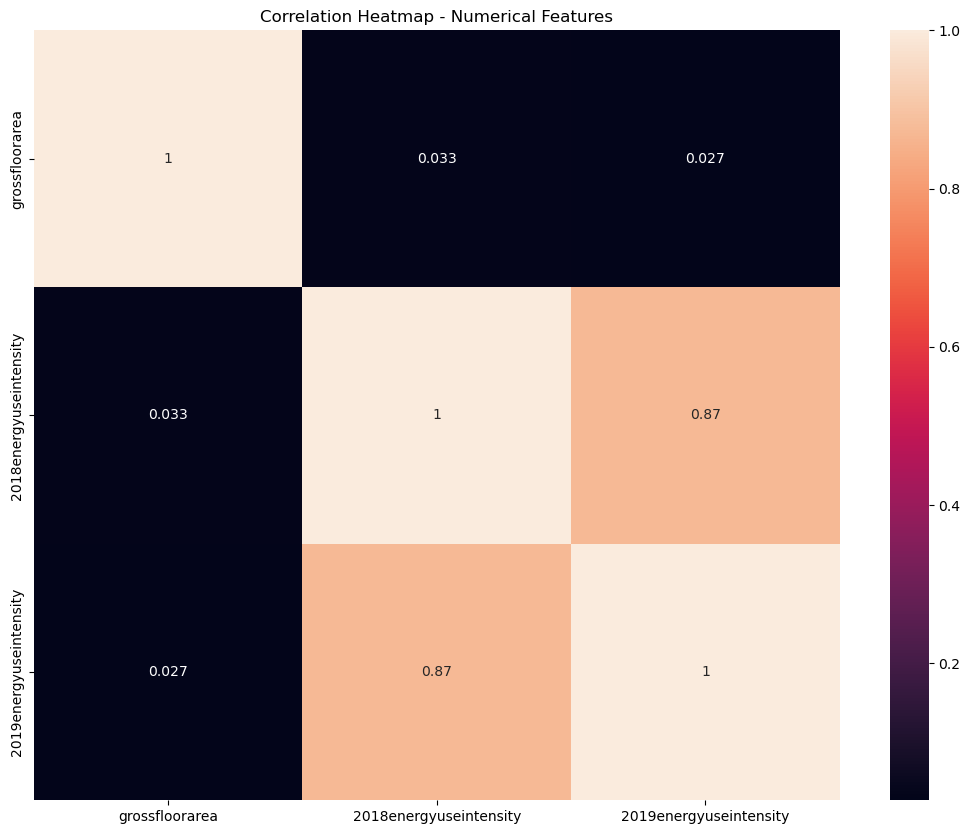

In [21]:
numerical_dataframe = dataframe[numerical_columns]
corr = numerical_dataframe.corr(method='pearson')

fig, ax = plt.subplots(figsize = (13, 10))
sns.heatmap(corr, ax=ax, annot= True)
ax.set_title('Correlation Heatmap - Numerical Features');

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b> 

1. **`grossfloorarea` and `2018energyuseintensity`**: The correlation value is `0.033`, which is close to `0`. This implies a very weak positive linear relationship between these two features. In other words, changes in the `grossfloorarea` might have a negligible positive effect on `2018energyuseintensity` and vice-versa.

2. **`grossfloorarea` and `2019energyuseintensity`**: The correlation value is `0.027`, even closer to `0` than the previous one. This suggests an even weaker positive linear relationship between these features. Thus, the `grossfloorarea` has a very minimal positive association with the `2019energyuseintensity`.

3. **`2018energyuseintensity` and `2019energyuseintensity`**: The correlation value is `0.87`. This indicates a strong positive linear relationship between the energy use intensity of 2018 and 2019. As one increases, the other is also likely to increase, and vice-versa. Given the nature of these features, this correlation makes sense since energy use patterns in consecutive years for buildings might be consistent.

**General Takeaway**: 
- The strongest observed correlation is between the energy use intensities of 2018 and 2019, suggesting that buildings that had higher/lower energy use in 2018 also had a similar pattern in 2019.
- The `grossfloorarea` of buildings has a very weak association with their energy use intensities for both 2018 and 2019. This means that just knowing the floor area might not be a strong predictor for a building's energy consumption in those years.
</p>
</div>

**Correlation Heatmap - Categorical Features:**

`Phik` correlation is used to compute the correlation coefficient of numerical features.

interval columns not set, guessing: ['greenmarkyearaward']


interval columns not set, guessing: ['greenmarkyearaward', 'grossfloorarea', '2018energyuseintensity', '2019energyuseintensity']


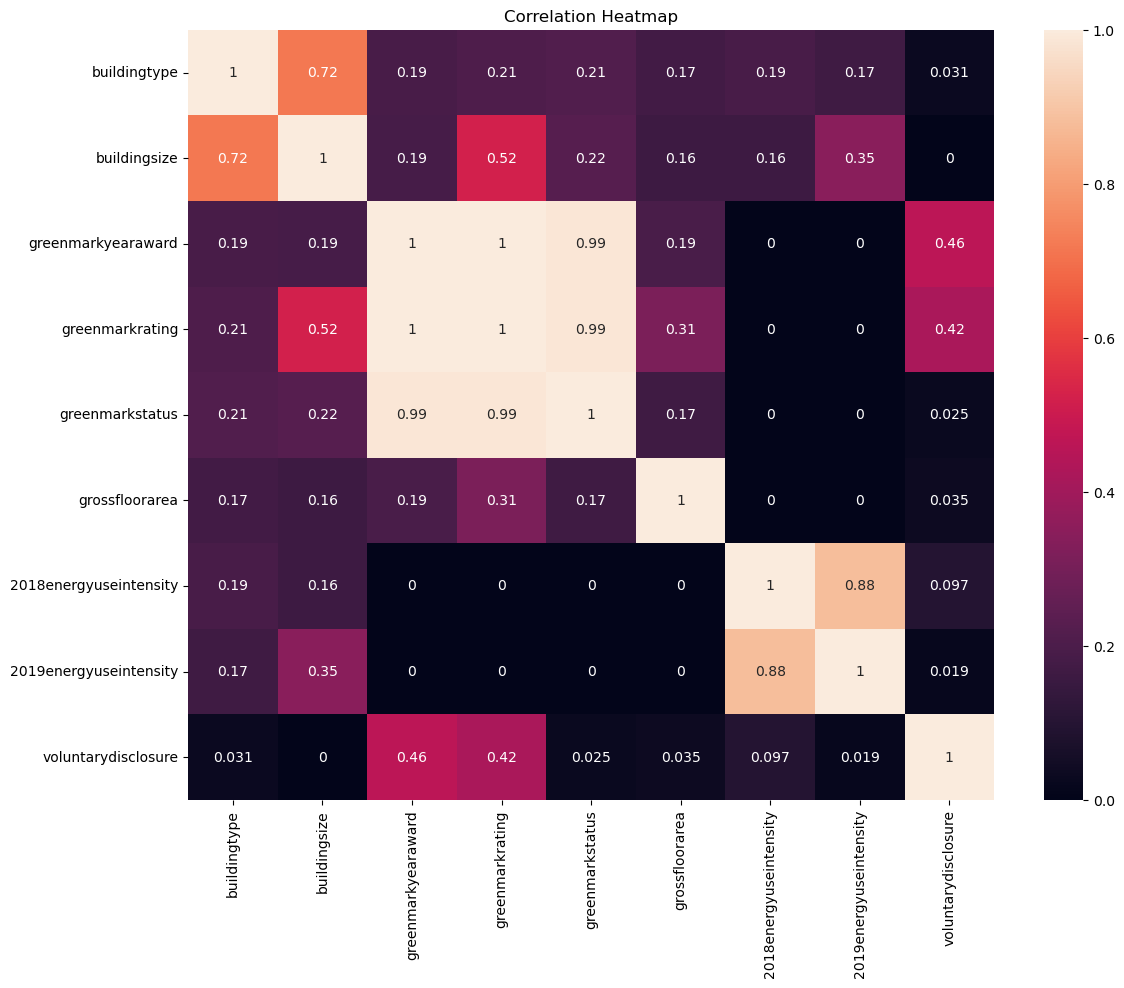

In [22]:
categorical_columns = [
    col for col in categorical_columns if col not in columns_to_drop
]
corr = phik_matrix(dataframe[categorical_columns])
corr = phik_matrix(dataframe)

fig, ax = plt.subplots(figsize = (13, 10))
sns.heatmap(corr, ax=ax, annot= True)
ax.set_title('Correlation Heatmap');

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b> 


1. **Highly Correlated Features**:
   - `buildingtype` and `buildingsize` have a correlation coefficient of 0.72, indicating a strong positive association between the two. It suggests that as one variable changes or takes on certain categories, the other variable likely changes in a predictable manner.
   - `greenmarkrating` and `greenmarkstatus` show an extremely high correlation of 0.99, suggesting that they are almost identical in the information they provide or that one column's category can almost perfectly predict the other's.
   - Similarly, `greenmarkyearaward` has a correlation of 0.99 with both `greenmarkrating` and `greenmarkstatus`, further emphasizing the tight relationship among these three features.

2. **Moderately Correlated Features**:
   - `buildingsize` and `greenmarkrating` have a coefficient of 0.52, which means there's a moderate positive relationship between these two categorical features.
   - `voluntarydisclosure` and both `greenmarkrating` and `greenmarkyearaward` have correlations around 0.46, indicating that there's some moderate relationship, but not as strong as the pairs mentioned earlier.

3. **Low or No Correlation**:
   - Features like `buildingtype` and `voluntarydisclosure`, `buildingsize` and `voluntarydisclosure`, and `buildingsize` and `greenmarkstatus` have correlations close to 0, indicating that these pairs have very weak or almost no relationship in the context of their categories.
   - The exact zero value between `buildingsize` and `voluntarydisclosure` is noteworthy. This might suggest that there's absolutely no relationship between these variables for the given dataset, or it could be a result of how the phi-k correlation was calculated or data preprocessing.

**Summary**:

In summary, the matrix provides insights into the relationships among the categorical columns in the dataset. There are tight relationships among the `greenmark` related features, suggesting potential multicollinearity or redundancy. Meanwhile, there are moderate to weak relationships among some of the other features. The presence of exact zeros may be valid, but it's always a good idea to ensure they aren't due to data or computational errors.

</p>
</div>

interval columns not set, guessing: ['greenmarkyearaward', 'grossfloorarea', '2018energyuseintensity', '2019energyuseintensity']


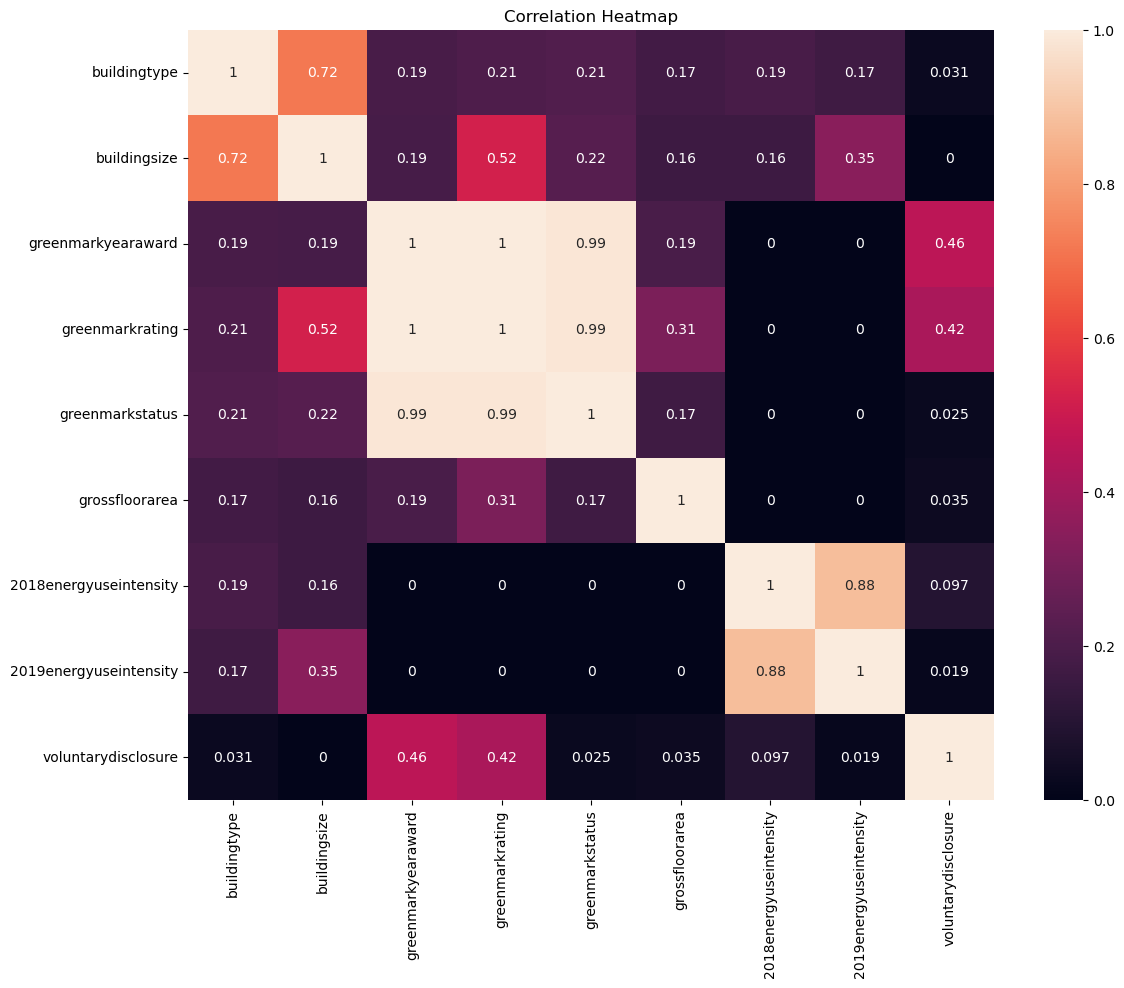

In [23]:
corr = phik_matrix(dataframe)
fig, ax = plt.subplots(figsize = (13, 10))
sns.heatmap(corr, ax=ax, annot= True)
ax.set_title('Correlation Heatmap');

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b> 


1. **Highly Correlated Features**:
   - `buildingtype` and `buildingsize` have a correlation coefficient of 0.72, indicating a strong positive association.
   - `greenmarkyearaward`, `greenmarkrating`, and `greenmarkstatus` have values close to 1 with each other, indicating an almost perfect positive association among them.
   - `2018energyuseintensity` and `2019energyuseintensity` have a correlation of 0.88, which is also a strong positive association.

2. **Moderately Correlated Features**:
   - `buildingsize` and `greenmarkrating` have a correlation of 0.52, which is a moderate positive association.
   - `2019energyuseintensity` and `buildingsize` have a coefficient of 0.35, indicating a moderate positive association.
   - Few other pairs like `greenmarkyearaward` and `voluntarydisclosure`, `greenmarkrating` and `voluntarydisclosure`, etc., also have moderate correlations.

3. **Low Correlation**: 
   - Most of the other pairs not mentioned above have correlation coefficients close to 0, indicating a very weak or almost no association between them.

</p>
</div>

## 7. Outliers Detection<a class="anchor" id="outliers"></a>

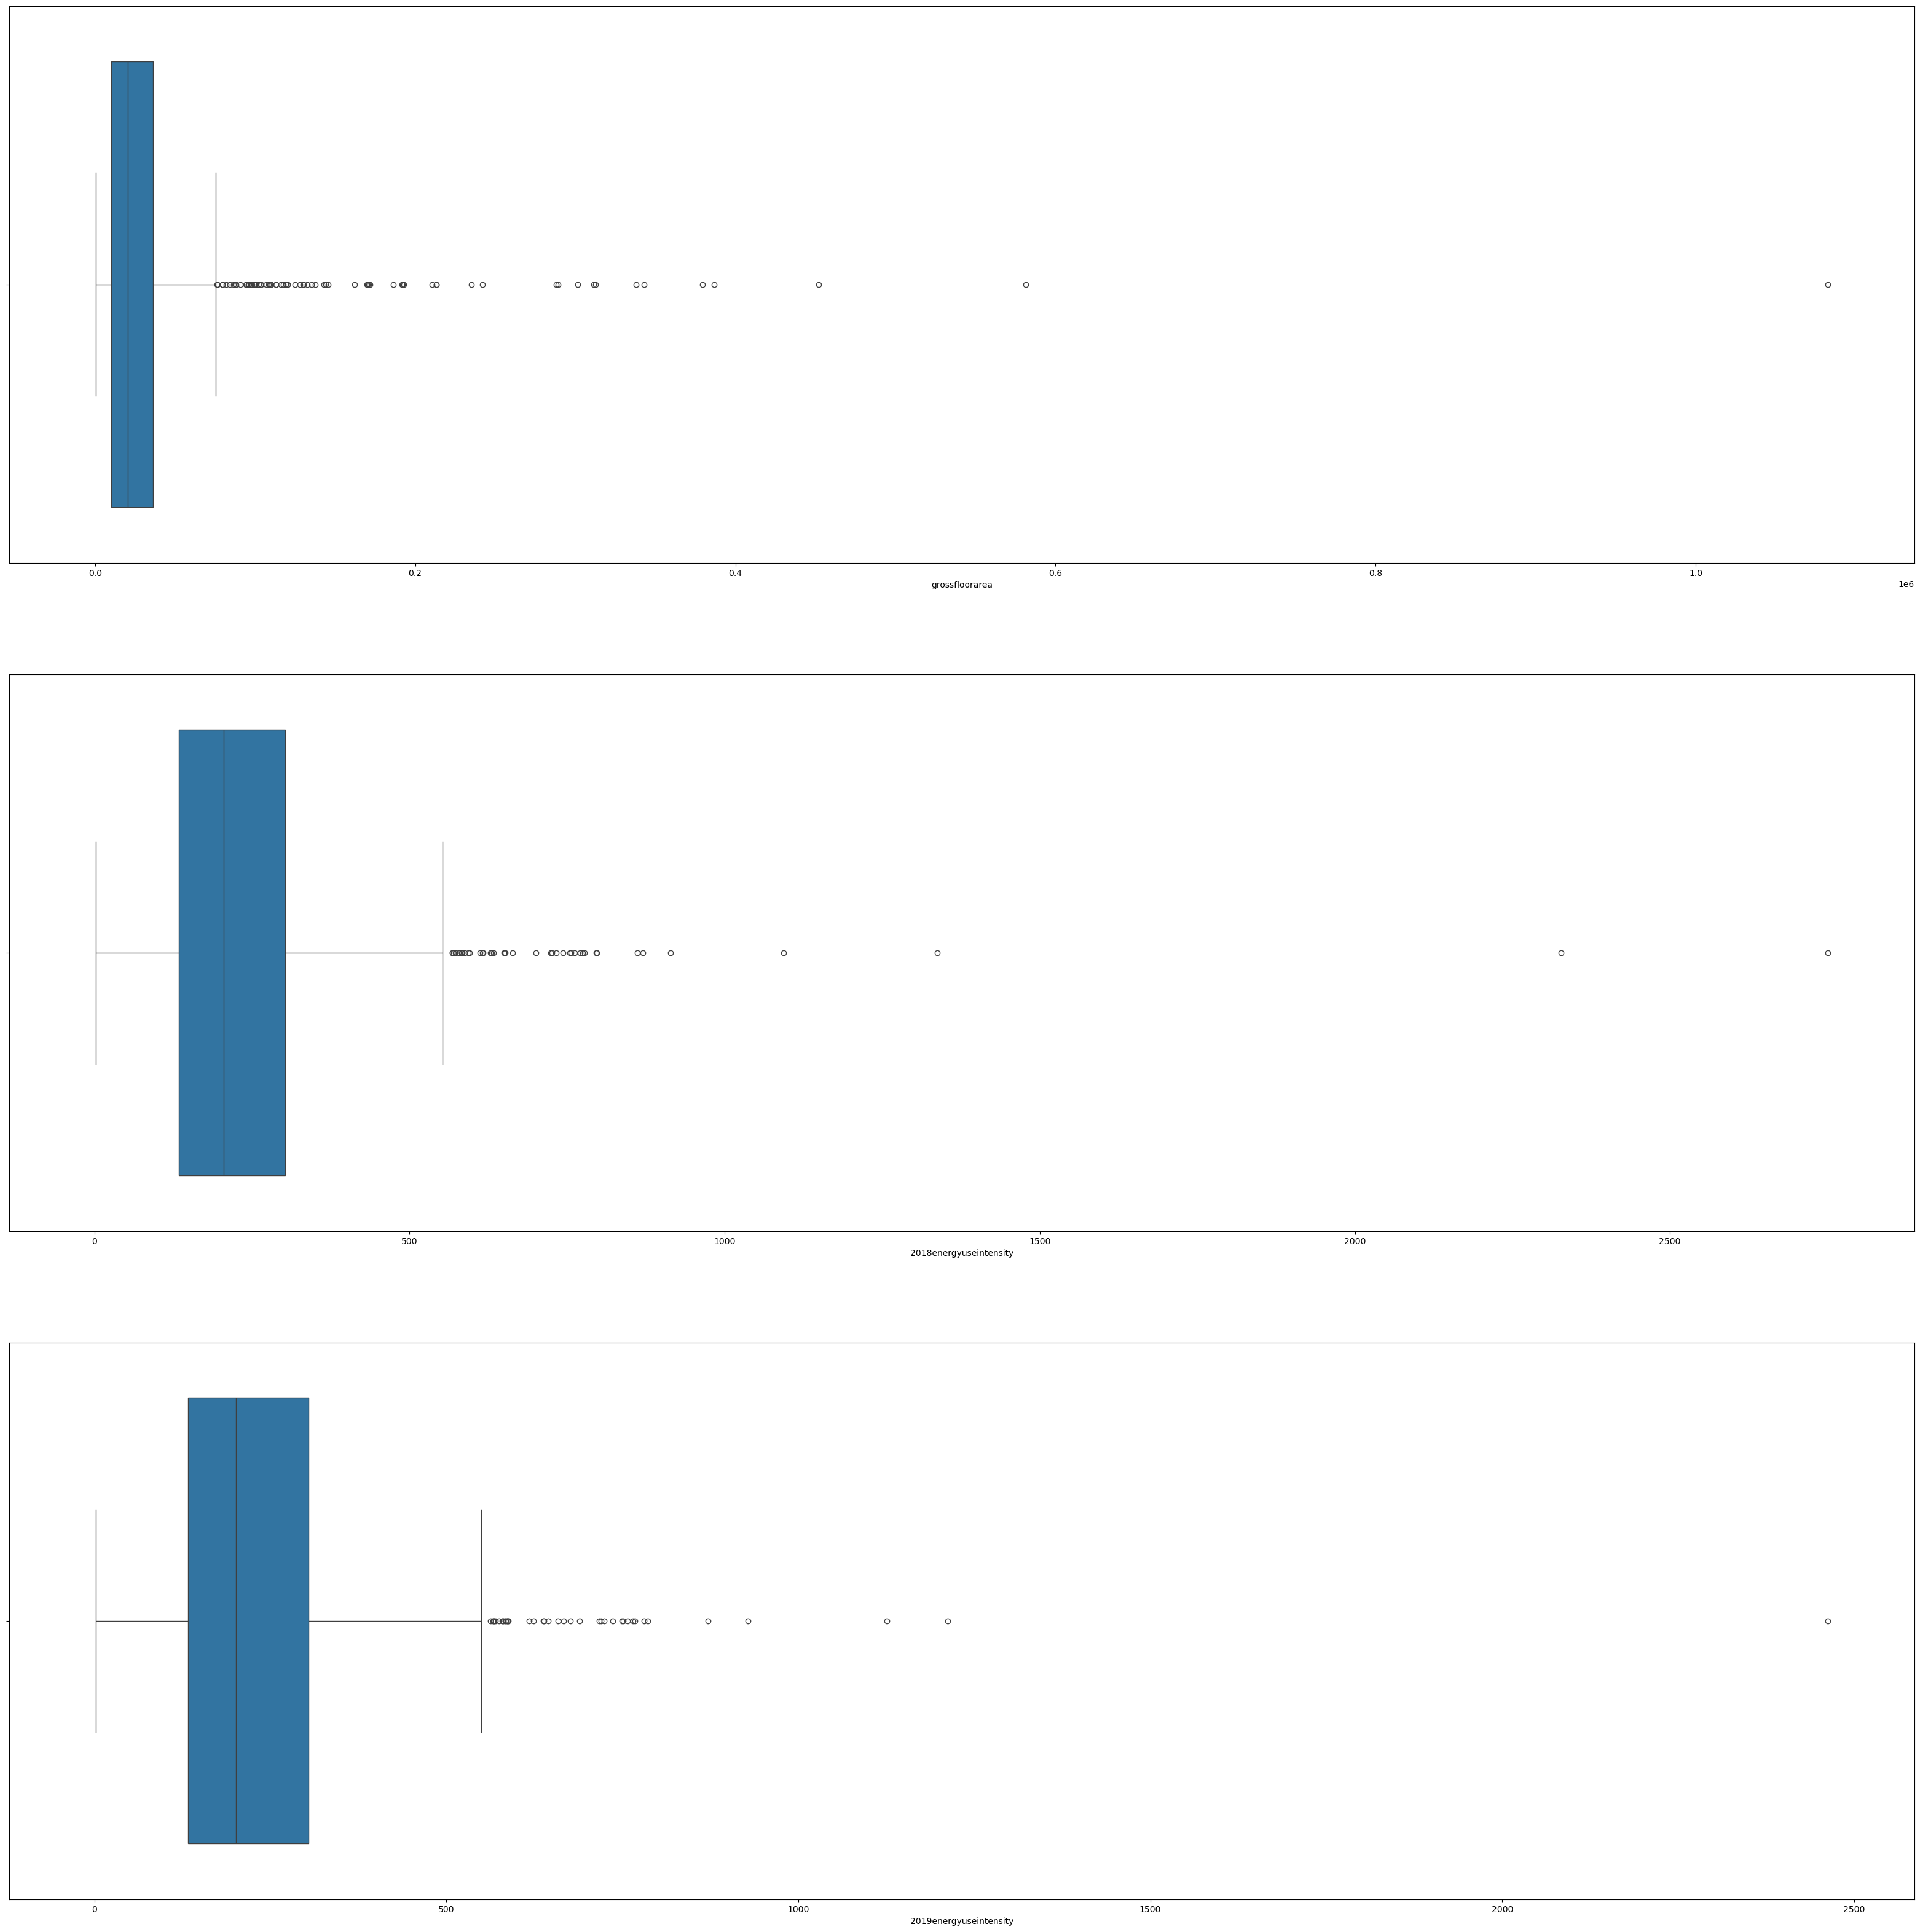

In [24]:
fig, axis = plt.subplots(3, 1, figsize = (40, 40))

sns.boxplot(data = dataframe, x = 'grossfloorarea', ax=axis[0])
sns.boxplot(data = dataframe, x = '2018energyuseintensity', ax=axis[1])
sns.boxplot(data = dataframe, x = '2019energyuseintensity', ax=axis[2]);

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b> 
    
Based on the boxplots of the numerical features, we can note the presence of outliers for all three features. Hence, we can utilise statistical tests - `Z-score` and `IQR` to identify outlier values.

</p>
</div>

**Utilise Z-score and IQR (Interquartile Range) to detect outliers:**

In [25]:
for col in numerical_columns:
    identify_iqr_outliers(dataframe=dataframe, column=col)

INFO:root:For feature 'grossfloorarea', IQR detected outliers values are: 
        [137488.0, 84229.0, 95625.0, 86492.0, 103899.0, 312724.0, 145650.0, 82003.0, 116055.0, 338032.0, 102356.0, 117542.0, 99576.0, 120384.0, 95992.0, 100096.0, 162134.0, 120263.0, 106793.0, 169727.0, 79650.0, 95555.0, 129726.0, 100125.0, 386781.0, 144109.0, 99012.0, 170856.0, 127860.0, 76504.0, 79709.0, 119287.0, 170288.0, 90517.0, 79471.0, 452045.0, 108169.0, 94393.0, 87486.0, 87527.0, 142853.0, 135183.0, 132527.0, 113071.55, 97189.0, 581511.0, 94046.0, 118984.0, 343000.0, 186357.0, 288000.0, 103534.0, 124670.0, 112932.0, 191832.0, 234939.0, 191873.0, 171698.0, 109181.0, 109862.0, 109703.0, 1082515.0, 311486.0, 379350.0, 213343.0, 289060.0, 213343.0, 130424.0, 192820.0, 97876.0, 87829.0, 76000.0, 241796.0, 210427.0, 301318.0]
        
INFO:root:For feature '2018energyuseintensity', IQR detected outliers values are: 
        [754.5639482761802, 573.0389203206034, 663.3395348129419, 700.850101742755, 1093.1179

In [26]:
for col in numerical_columns:
    identify_z_score_outliers(dataframe=dataframe, column=col)

INFO:root:For feature 'grossfloorarea', Z-score detected outliers values are: 
        [312724.0, 338032.0, 386781.0, 452045.0, 581511.0, 343000.0, 288000.0, 234939.0, 1082515.0, 311486.0, 379350.0, 289060.0, 241796.0, 301318.0]
        
INFO:root:For feature '2018energyuseintensity', Z-score detected outliers values are: 
        [1093.117900172117, 869.9414760273972, 861.5647144209529, 914.5071958049076, 2750.3506024096387, 2327.161820349085, 1337.7270275590552]
        
INFO:root:For feature '2019energyuseintensity', Z-score detected outliers values are: 
        [1126.0738929744955, 768.096875, 785.791883467551, 871.2110697380878, 780.77089457802, 765.0113460090362, 928.0795957641785, 2462.4904742443596, 1211.74217847769]
        


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b> 

**1. Interquartile Range (IQR) Method:**

- For `grossfloorarea`, a significant number of values were detected as outliers. This might indicate that some buildings or areas in your dataset are exceptionally larger than others.
- `2018energyuseintensity` and `2019energyuseintensity` also show several outliers. Given these are energy use intensities for different years, it indicates that certain entries had unusually high or low energy consumption relative to their floor area in both years.

**2. Z-score Method:**

- The Z-score method tends to be stricter than the IQR method. For `grossfloorarea`, fewer values were detected as outliers when compared to the IQR method.
- Similarly, for energy use intensities in both 2018 and 2019, fewer values were deemed outliers, but those detected can be considered extreme outliers since their deviation from the mean is significant.

**Considerations:**

- Before deciding on dropping or transforming outliers, it's essential to understand the nature of the data which requires domain knowledge. In the case of `grossfloorarea`, is it possible that there are significant differences in building sizes? For energy intensity, are there valid reasons why some buildings might have unusually high or low values?

- When considering the choice of regression models such as `Linear Regression`, presence of outliers can heavily influence the regression line, leading to a model that may not generalize well. However, tree-based models such as `Decision Trees` and `Random Forests` are less sensitive to outliers.
  
**Handling of Outliers:**

- **Dropping:** If the outliers values are believed to be errors or not representative of the population, one can consider dropping them.
- **Capping:** Set a threshold and cap values beyond this threshold. For example, any value above the upper whisker of a boxplot could be set to the value of the upper whisker.
- **Transformation:** Techniques like log-transformation can compress extreme values, making them closer to the bulk of the data. This can be useful, especially for linear models.
</p>
</div>